[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
(8, 8)


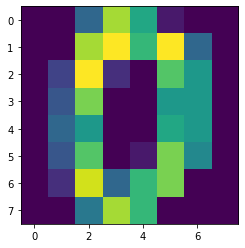

0


In [9]:
from sklearn.datasets import load_digits
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
data = load_digits()    #导入手写数字数据集
x = data.data
y = data.target
print(x.shape,y.shape)
print(data.images[0])
print(data.images[0].shape)  #查看第一张图
plt.imshow(data.images[0])   #第一张图画出来
plt.show()
print(data.target[0])  #第一张图归类
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

伯努利朴素贝叶斯
特征变量是布尔变量，符合 0/1 分布，在文档分类中特征是单词是否出现。

In [16]:
#伯努利朴素贝叶斯
model_b =MultinomialNB()
model_b = model_b.fit(x_train,y_train)   #用训练器数据拟合分类器模型并对训练器数据X进行预测
pred_b =model_b.predict(x_test)
accuracy_score_b = accuracy_score(y_test,pred_b)
print('BermouliNB准确率为： %.4lf'% accuracy_score_b)
print(model_b.class_log_prior_)     # 每个类别的先验概率

BermouliNB准确率为： 0.9222
[-2.32867046 -2.35033196 -2.28670626 -2.23987496 -2.33583895 -2.30746826
 -2.30746826 -2.23336028 -2.357658   -2.28670626]


高斯朴素贝叶斯（Gaussian naive Bayes）
特征变量是连续变量，假设数据服从高斯分布，且变量无协方差（no covariance，指线性无关）。只要找出每个标签的所有样本点均值和标准差，再定义一个高斯分布，就可以拟合模型。当然，由于分类的最终效果只能依赖于一开始的模型假设，因此高斯朴素贝叶斯经常得不到非常好的结果。

In [29]:
#高斯朴素贝叶斯
model_g = GaussianNB()
model_g.fit(x_train,y_train)     #用训练器数据拟合分类器模型并对训练器数据X进行预测
pred_g =model_g.predict(x_test)
accuracy_score_g = accuracy_score(y_test,pred_g)
print('GaussianNB准确率: %.4lf' % accuracy_score_g)
print(model_g.class_prior_)

GaussianNB准确率: 0.8500
[0.09464161 0.10160056 0.09951287 0.10160056 0.09881698 0.10438413
 0.10020877 0.10368824 0.08977035 0.10577592]


多项式朴素贝叶斯（multinomial naive Bayes）
特征变量是离散变量，符合多项分布，在文档分类中特征变量体现在一个单词出现的次数，或者是单词的 TF-IDF 值等。
它假设特征是由一个简单多项式分布生成的。多项分布可以描述各种类型样本出现次数的概率，因此多项式朴素贝叶斯非常适合用于描述出现次数或者出现次数比例的特征。

In [28]:
#多项式朴素贝叶斯
model_m = BernoulliNB(fit_prior=True)     
model_m.fit(x_train,y_train)     #用训练器数据拟合分类器模型并对训练器数据X进行预测
pred_m = model_m.predict(x_test)
accuracy_score_m = accuracy_score(y_test,pred_m)
print('MultionmialNB准确率： %.4lf' % accuracy_score_m)
print(model_m.class_log_prior_)

MultionmialNB准确率： 0.8806
[-2.357658   -2.28670626 -2.30746826 -2.28670626 -2.31448583 -2.25967759
 -2.30049959 -2.26636658 -2.41050048 -2.24643237]
